In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [5]:
from loader import DataLoader
dl = DataLoader()
train_primitive_matrix, val_primitive_matrix, test_primitive_matrix, \
train_ground, val_ground, test_ground, mode, frameNums = dl.load_data(mode = 'res18', numFramesToLoad = 1000)
# mode stores the method of loading data here

1 frames successfully loaded out of 1000
2 frames successfully loaded out of 1000
3 frames successfully loaded out of 1000
4 frames successfully loaded out of 1000
5 frames successfully loaded out of 1000
6 frames successfully loaded out of 1000
7 frames successfully loaded out of 1000
8 frames successfully loaded out of 1000
9 frames successfully loaded out of 1000
10 frames successfully loaded out of 1000
11 frames successfully loaded out of 1000
12 frames successfully loaded out of 1000
13 frames successfully loaded out of 1000
14 frames successfully loaded out of 1000
15 frames successfully loaded out of 1000
16 frames successfully loaded out of 1000
17 frames successfully loaded out of 1000
18 frames successfully loaded out of 1000
19 frames successfully loaded out of 1000
20 frames successfully loaded out of 1000
21 frames successfully loaded out of 1000
22 frames successfully loaded out of 1000
23 frames successfully loaded out of 1000
24 frames successfully loaded out of 1000
2

195 frames successfully loaded out of 1000
196 frames successfully loaded out of 1000
197 frames successfully loaded out of 1000
198 frames successfully loaded out of 1000
199 frames successfully loaded out of 1000
200 frames successfully loaded out of 1000
201 frames successfully loaded out of 1000
202 frames successfully loaded out of 1000
203 frames successfully loaded out of 1000
204 frames successfully loaded out of 1000
205 frames successfully loaded out of 1000
206 frames successfully loaded out of 1000
207 frames successfully loaded out of 1000
208 frames successfully loaded out of 1000
209 frames successfully loaded out of 1000
210 frames successfully loaded out of 1000
211 frames successfully loaded out of 1000
212 frames successfully loaded out of 1000
213 frames successfully loaded out of 1000
214 frames successfully loaded out of 1000
215 frames successfully loaded out of 1000
216 frames successfully loaded out of 1000
217 frames successfully loaded out of 1000
218 frames 

386 frames successfully loaded out of 1000
387 frames successfully loaded out of 1000
388 frames successfully loaded out of 1000
389 frames successfully loaded out of 1000
390 frames successfully loaded out of 1000
391 frames successfully loaded out of 1000
392 frames successfully loaded out of 1000
393 frames successfully loaded out of 1000
394 frames successfully loaded out of 1000
395 frames successfully loaded out of 1000
396 frames successfully loaded out of 1000
397 frames successfully loaded out of 1000
398 frames successfully loaded out of 1000
399 frames successfully loaded out of 1000
400 frames successfully loaded out of 1000
401 frames successfully loaded out of 1000
402 frames successfully loaded out of 1000
403 frames successfully loaded out of 1000
404 frames successfully loaded out of 1000
405 frames successfully loaded out of 1000
406 frames successfully loaded out of 1000
407 frames successfully loaded out of 1000
408 frames successfully loaded out of 1000
409 frames 

577 frames successfully loaded out of 1000
578 frames successfully loaded out of 1000
579 frames successfully loaded out of 1000
580 frames successfully loaded out of 1000
581 frames successfully loaded out of 1000
582 frames successfully loaded out of 1000
583 frames successfully loaded out of 1000
584 frames successfully loaded out of 1000
585 frames successfully loaded out of 1000
586 frames successfully loaded out of 1000
587 frames successfully loaded out of 1000
588 frames successfully loaded out of 1000
589 frames successfully loaded out of 1000
590 frames successfully loaded out of 1000
591 frames successfully loaded out of 1000
592 frames successfully loaded out of 1000
593 frames successfully loaded out of 1000
594 frames successfully loaded out of 1000
595 frames successfully loaded out of 1000
596 frames successfully loaded out of 1000
597 frames successfully loaded out of 1000
598 frames successfully loaded out of 1000
599 frames successfully loaded out of 1000
600 frames 

768 frames successfully loaded out of 1000
769 frames successfully loaded out of 1000
770 frames successfully loaded out of 1000
771 frames successfully loaded out of 1000
772 frames successfully loaded out of 1000
773 frames successfully loaded out of 1000
774 frames successfully loaded out of 1000
775 frames successfully loaded out of 1000
776 frames successfully loaded out of 1000
777 frames successfully loaded out of 1000
778 frames successfully loaded out of 1000
779 frames successfully loaded out of 1000
780 frames successfully loaded out of 1000
781 frames successfully loaded out of 1000
782 frames successfully loaded out of 1000
783 frames successfully loaded out of 1000
784 frames successfully loaded out of 1000
785 frames successfully loaded out of 1000
786 frames successfully loaded out of 1000
787 frames successfully loaded out of 1000
788 frames successfully loaded out of 1000
789 frames successfully loaded out of 1000
790 frames successfully loaded out of 1000
791 frames 

959 frames successfully loaded out of 1000
960 frames successfully loaded out of 1000
961 frames successfully loaded out of 1000
962 frames successfully loaded out of 1000
963 frames successfully loaded out of 1000
964 frames successfully loaded out of 1000
965 frames successfully loaded out of 1000
966 frames successfully loaded out of 1000
967 frames successfully loaded out of 1000
968 frames successfully loaded out of 1000
969 frames successfully loaded out of 1000
970 frames successfully loaded out of 1000
971 frames successfully loaded out of 1000
972 frames successfully loaded out of 1000
973 frames successfully loaded out of 1000
974 frames successfully loaded out of 1000
975 frames successfully loaded out of 1000
976 frames successfully loaded out of 1000
977 frames successfully loaded out of 1000
978 frames successfully loaded out of 1000
979 frames successfully loaded out of 1000
980 frames successfully loaded out of 1000
981 frames successfully loaded out of 1000
982 frames 

# Reef Steps
Reef generates heuristics in an iterative manner, with each iteration consisting of the following steps:
1. Synthesize Heuristics
2. Prune Heuristics
3. Verify Heuristics

In this tutorial, we go through the three stages of Reef individually and then repeat the process iteratively.

In the cell below, we run a single iteration by calling the `run_synthesizer` function. We pass in the primitive matrices for the `train` and `val` sets, along with ground truth labels for `val`. While we also pass in ground truth labels for `train`, this is solely for evaluation purposes. 

`max_cardinality` is the maximum number of primitives a heuristic takes as input, `keep` is how many heuristics the pruner should select (3 for the first iteration, 1 after that) and `model` is the type of heuristic to generate, in this case, `decision_tree`. 

_This cell does not output anything, only saves values in HeuristicGenerator._

In [6]:
from program_synthesis.heuristic_generator import HeuristicGenerator
hg = HeuristicGenerator(train_primitive_matrix, val_primitive_matrix, val_ground, train_ground, b=0.5)
hg.run_synthesizer(max_cardinality=1, idx=None, keep=3, model='dt')

## 1. Synthesize Heuristics
We start by generating all possible heuristics based on the labeled, validation set that take in a single feature (i.e. word for this example) as input. 

For this example, we use decision trees with maximum depth 1 (`dt`) as our heuristic form. We first generate all possible heuristics that take a single feature in as input.

In [7]:
from program_synthesis.synthesizer import Synthesizer
syn = Synthesizer(val_primitive_matrix, val_ground, b=0.5)

heuristics, feature_inputs = syn.generate_heuristics('nn', 1)
print("Total Heuristics Generated: ", np.shape(heuristics)[1])

Total Heuristics Generated:  512


For each generated heuristic, we find an associated $\beta$ value.  This corresponds to defining a region of **low confidence** labels, which the heuristic will abstain for, while labeling the rest of the datapoints as $1$ or $-1$.

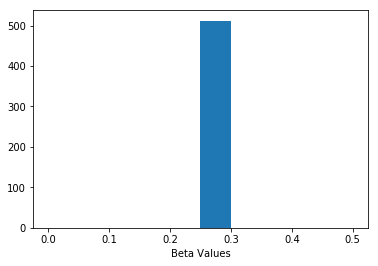

In [8]:
optimal_betas = syn.find_optimal_beta(heuristics[0], val_primitive_matrix, feature_inputs[0], val_ground)
plt.hist(optimal_betas, range=(0,0.5));
plt.xlabel('Beta Values');

## 2. Prune Heuristics
In the first iteration, we simply pick the 3 heuristics that perform the best on the labeled validation set. 

In [9]:
top_idx = hg.prune_heuristics(heuristics, feature_inputs, keep=3)
print('Features chosen heuristics are based on: ', top_idx)

Features chosen heuristics are based on:  [ 86 113 459]


In subsequent iterations (step 4), we weight the Jaccard score (overlap of how many datapoints in the train set receive labels and how many are labeled by existing heuristics) and F1 score equally. We demonstrate this with a toy vector of previously labeled data.

## 3. Verify Heuristics
In this step, we use the labels the heuristics assign to the **unlabeled train set** to estimate heuristic accuracies and assign probabilistic training labels to the same set accordingly (see [snorkel.stanford.edu](http://snorkel.stanford.edu) for more details). 

In [10]:
from program_synthesis.verifier import Verifier
verifier = Verifier(hg.L_train, hg.L_val, val_ground, has_snorkel=False)

verifier.train_gen_model()
verifier.assign_marginals()

We visualize what these labels look like. Note that with a single iteration, none of the datapoints receive a probabilistic label greater than 0.5, but this is fixed after running the process iteratively (Step 4). __These labels are then used to train an end model, such as an LSTM, and not used as final predictions.__ 

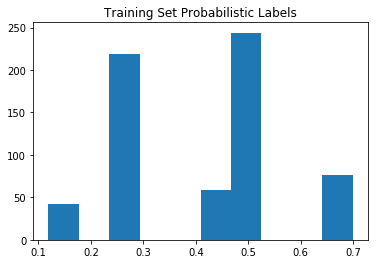

In [11]:
plt.hist(verifier.train_marginals); plt.title('Training Set Probabilistic Labels');

Since we do not have access to ground truth labels for the train set, we use the distribution of labels for the labeled validation set to decide what feedback to pass to the synthesizer. We pass datapoints with low confidence (labels near 0.5, i.e. equal probability of being +1 or -1) to the synthesizer

Percentage of Low Confidence Points:  0.4625


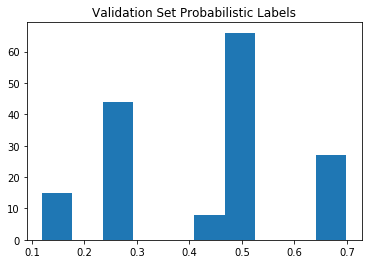

In [12]:
plt.hist(verifier.val_marginals); plt.title('Validation Set Probabilistic Labels');
feedback_idx = verifier.find_vague_points(gamma=0.1,b=0.5)
print('Percentage of Low Confidence Points: ', np.shape(feedback_idx)[0]/float(np.shape(val_ground)[0]))

## 4. Repeat Iterative Process of Generating Heuristics
We repeat this process of synthesizing, pruning, and verifying heuristics iteratively. In this example, we generate 25 total heuristics. 

_Note that this process wil take a few minutes to run since heuristic generation is not currently optimized in any manner_

Running iteration:  5
Running iteration:  10
Running iteration:  15
Running iteration:  20


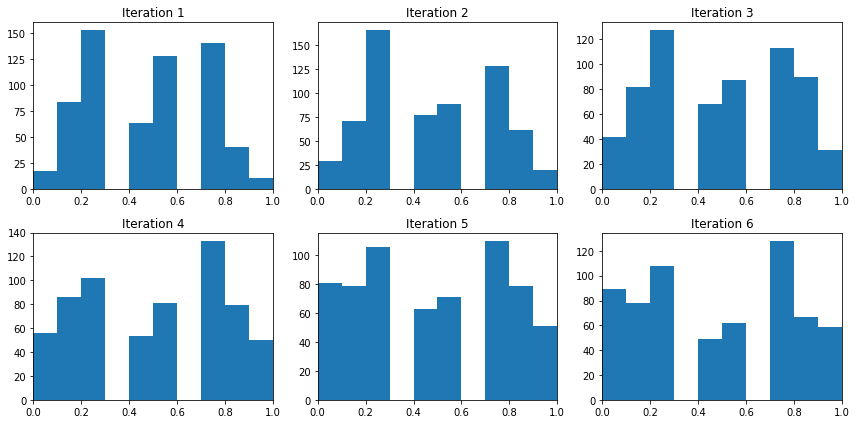

In [13]:
validation_accuracy = []
training_accuracy = []
validation_coverage = []
training_coverage = []

training_marginals = []
idx = None

hg = HeuristicGenerator(train_primitive_matrix, val_primitive_matrix, 
                            val_ground, train_ground, 
                            b=0.5)
plt.figure(figsize=(12,6));
for i in range(3,26):
    if (i-2)%5 == 0:
        print("Running iteration: ", str(i-2))
        
    #Repeat synthesize-prune-verify at each iterations
    if i == 3:
        hg.run_synthesizer(max_cardinality=1, idx=idx, keep=3, model='nn')
    else:
        hg.run_synthesizer(max_cardinality=1, idx=idx, keep=1, model='nn')
    hg.run_verifier()
    
    #Save evaluation metrics
    va,ta, vc, tc = hg.evaluate()
    validation_accuracy.append(va)
    training_accuracy.append(ta)
    training_marginals.append(hg.vf.train_marginals)
    validation_coverage.append(vc)
    training_coverage.append(tc)
    
    #Plot Training Set Label Distribution
    if i <= 8:
        plt.subplot(2,3,i-2)
        plt.hist(training_marginals[-1], bins=10, range=(0.0,1.0)); 
        plt.title('Iteration ' + str(i-2));
        plt.xlim([0.0,1.0])
        # plt.ylim([0,825])
    
    #Find low confidence datapoints in the labeled set
    hg.find_feedback()
    idx = hg.feedback_idx
    
    #Stop the iterative process when no low confidence labels
    if idx == []:
        break
plt.tight_layout()

In the plots above, we show the distribution of probabilistic labels Reef assigns to the training set in the first few iterations.

Next, we look at the accuracy and coverage of labels assigned to the training set in the _last_ iteration. The coverage is the percentage of training set datapoints that receive at least one label from the generated heuristics.

Program Synthesis Train Accuracy:  0.5390625
Program Synthesis Train Coverage:  1.0
Program Synthesis Validation Accuracy:  1.0
[0.5052631578947369, 0.4820261437908497, 0.4951923076923077, 0.5007923930269413, 0.5094339622641509, 0.5078369905956113, 0.5203125, 0.5203125, 0.5109375, 0.51875, 0.5203125, 0.5234375, 0.540625, 0.5296875, 0.5328125, 0.5421875, 0.53125, 0.521875, 0.5296875, 0.5390625, 0.540625, 0.540625, 0.5390625]
[0.8859060402684564, 0.8838709677419355, 0.9113924050632911, 0.9240506329113924, 0.93125, 0.95, 0.9375, 0.96875, 0.96875, 0.96875, 0.98125, 0.98125, 0.98125, 0.98125, 0.99375, 0.99375, 0.99375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


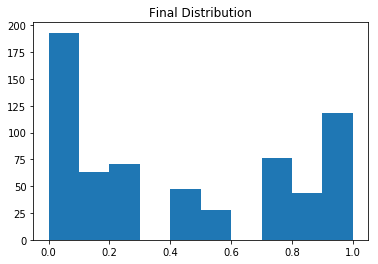

In [14]:
plt.hist(training_marginals[-1], bins=10, range=(0.0,1.0)); 
plt.title('Final Distribution');

print("Program Synthesis Train Accuracy: ", training_accuracy[-1])
print("Program Synthesis Train Coverage: ", training_coverage[-1])
print("Program Synthesis Validation Accuracy: ", validation_accuracy[-1])

print(training_accuracy)
print(validation_accuracy)

### Save Training Set Labels 
We save the training set labels Reef generates that we use in the next notebook to train a simple LSTM model.

In [15]:
filepath = '../data/' + 'weak_labels'
return_matrix = np.vstack((frameNums, training_marginals[-1]))
return_matrix = dict(return_matrix.swapaxes(0,1))
np.save(filepath+'_'+mode+'_reef.npy', return_matrix)

In [ ]:
print(frameNums)

In [ ]:
print(training_marginals[-1])